# Readme
1. Edit > Notebook settings > GPU

# ติดตั้ง Library  ที่ใช้งาน
- เสร็จแล้วให้กดที่ปุ่ม Restart Runtime

In [2]:
#!pip uninstall imageai -y
!pip install imageai --upgrade
!pip install tensorflow==2.4.0
!pip install tensorflow-gpu==2.4.0
!pip uninstall matplotlib -y
!pip install keras==2.4.3 numpy==1.19.3 pillow==7.0.0 scipy==1.4.1 h5py==2.10.0 matplotlib==3.3.2 opencv-python keras-resnet==0.2.0


     |████████████████████████████████| 160 kB 5.1 MB/s 
     |████████████████████████████████| 14.9 MB 56.4 MB/s 
     |████████████████████████████████| 2.9 MB 62.4 MB/s 
     |████████████████████████████████| 11.6 MB 61.7 MB/s 
     |████████████████████████████████| 2.1 MB 67.9 MB/s 
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=f9bcd0574772b13346132ea3d9f6a6d0b8d0e07fdbe6d8a57b03fb938c84c874
  Stored in directory: /root/.cache/pip/wheels/bd/ef/06/5d65f696360436c3a423020c4b7fd8c558c09ef264a0e6c575
Successfully built keras-resnet
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
 

     |████████████████████████████████| 394.7 MB 16 kB/s 
     |████████████████████████████████| 3.8 MB 51.9 MB/s 
     |████████████████████████████████| 462 kB 69.3 MB/s 
     |████████████████████████████████| 132 kB 81.9 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68719 sha256=ad81a7bac215c0502716b6d464787b5ce97151a3adf8cc24b5e360c4af53fafc
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.2.0
    Uninstalling typing-extensions-4.2.0:
      Successfully uninstalled typing-extensions-4.2.0
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.44.0
    Uninstalling grpcio-1.44.0:
      Successfully uninstalled grpcio-1.44.0
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.0.0
    Uninstalling absl-py-1.0.0:
      Successf

#ตรวจสอบ Device

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1192624183709177069, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14646682624
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 18201529528459608320
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

# เชื่อมต่อ google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## กำหนดที่อยู่ของ drive

In [ ]:
!unzip /content/drive/MyDrive/Objection-Detection-20220207T073451Z-001.zip

In [5]:
path = '/content/Objection-Detection'

#Pre-trained model
path_pretrainmodel = path + '/Pre-trained-Model/detection_model-ex-005--loss-0020.487.h5'

# Training imageai

In [6]:
from imageai.Detection.Custom import DetectionModelTrainer

trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory = path)

# using pre-trained model

trainer.setTrainConfig(object_names_array = ['text-label'], 
                       batch_size = 4, 
                       num_experiments = 5, 
#                       train_from_pretrained_model = path+'/Pre-trained-Model/detection_model-ex-005--loss-0020.487.h5')
                       train_from_pretrained_model = path+'/models/detection_model-ex-005--loss-0016.245.h5')
'''
# first time training
trainer.setTrainConfig(object_names_array = ['text-label'], 
                       batch_size = 4, 
                       num_experiments = 5, 
                       train_from_pretrained_model = ' ')
'''

trainer.trainModel()

Generating anchor boxes for training images and annotation...
Average IOU for 9 anchors: 0.81
Anchor Boxes generated.
Detection configuration saved in  /content/Objection-Detection/json/detection_config.json
Evaluating over 62 samples taken as 20.00% of the training set given at /content/Objection-Detection/train
Training over 248 samples  given at /content/Objection-Detection/train
Training on: 	['text-label']
Training with Batch Size:  4
Number of Training Samples:  248
Number of Validation Samples:  62
Number of Experiments:  5
Training with transfer learning from pretrained Model


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/5
496/496 [==============================] - 268s 515ms/step - loss: 29.8856 - yolo_layer_loss: 3.7432 - yolo_layer_1_loss: 8.9553 - yolo_layer_2_loss: 5.8691 - val_loss: 25.2472 - val_yolo_layer_loss: 1.8363 - val_yolo_layer_1_loss: 8.3323 - val_yolo_layer_2_loss: 6.2227
Epoch 2/5
496/496 [==============================] - 248s 499ms/step - loss: 22.2023 - yolo_layer_loss: 3.2229 - yolo_layer_1_loss: 5.8763 - yolo_layer_2_loss: 5.2295 - val_loss: 19.8454 - val_yolo_layer_loss: 1.5761 - val_yolo_layer_1_loss: 6.2440 - val_yolo_layer_2_loss: 5.8713
Epoch 3/5
496/496 [==============================] - 246s 496ms/step - loss: 18.5202 - yolo_layer_loss: 2.5614 - yolo_layer_1_loss: 4.5366 - yolo_layer_2_loss: 5.5201 - val_loss: 16.5108 - val_yolo_layer_loss: 1.7114 - val_yolo_layer_1_loss: 3.7696 - val_yolo_layer_2_loss: 5.5688
Epoch 4/5
496/496 [==============================] - 243s 489ms/step - loss: 17.4240 - yolo_layer_loss: 3.0799 - yolo_layer_1_loss: 3.9256 - yolo_layer_2_los

# Evaluation

In [8]:
import glob
import os
from imageai.Detection.Custom import DetectionModelTrainer
trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory= path)
metrics = trainer.evaluateModel(model_path = path+'/models/detection_model-ex-005--loss-0016.245.h5', 
                                json_path = path+'/json/detection_config.json', 
                                iou_threshold = 0.5, 
                                object_threshold = 0.3, 
                                nms_threshold = 0.5)

Starting Model evaluation....
Evaluating over 62 samples taken as 20.00% of the training set given at /content/Objection-Detection/train
Training over 248 samples  given at /content/Objection-Detection/train
Model File:  /content/Objection-Detection/models/detection_model-ex-005--loss-0016.245.h5 

Evaluation samples:  62
Using IoU:  0.5
Using Object Threshold:  0.3
Using Non-Maximum Suppression:  0.5
text-label: 0.6264
mAP: 0.6264


# Detection

In [12]:
!pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.3.2
Uninstalling matplotlib-3.3.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.3.2-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.3.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.3.2
     |████████████████████████████████| 13.1 MB 5.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageai 2.1.6 require

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "
/usr/local/lib/python3.7/dist-packages/imageai/Detection/Custom/__init__.py:1248: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-x))


text-label  :  57.54961371421814  :  [468, 633, 923, 668]


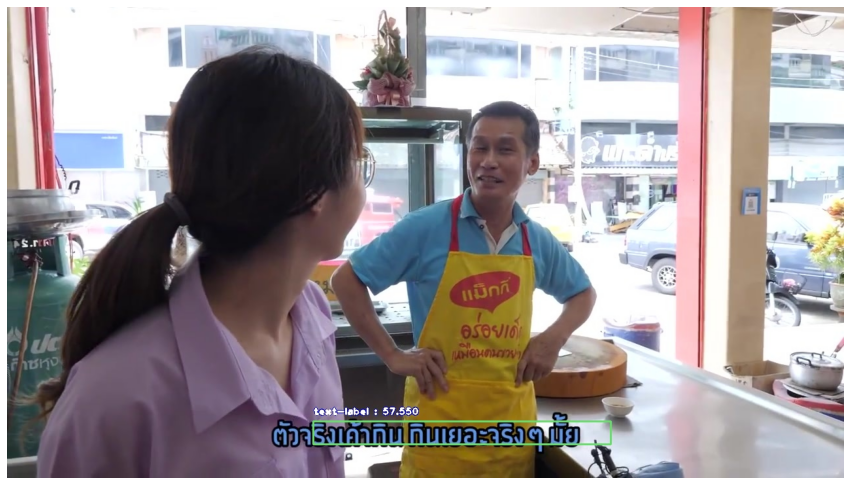

text-label  :  63.31105828285217  :  [433, 638, 953, 670]


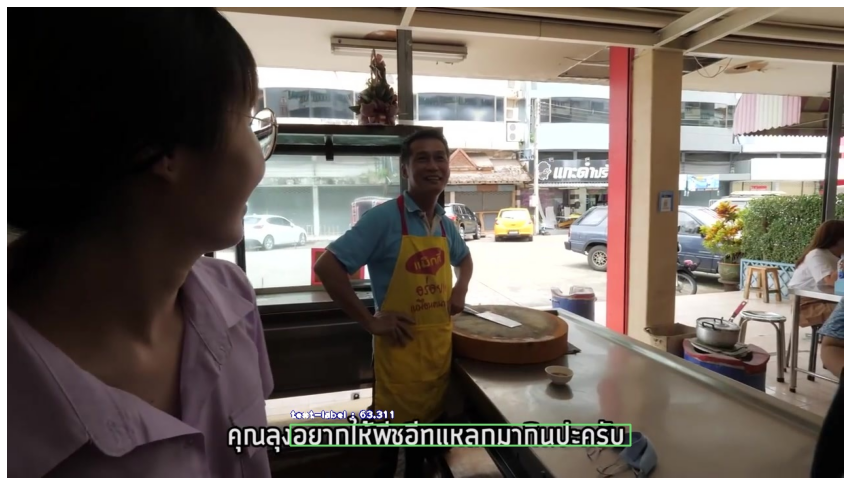

In [13]:
from imageai.Detection.Custom import CustomObjectDetection

import cv2
import matplotlib.pyplot as plt

detector = CustomObjectDetection()
detector.setModelTypeAsYOLOv3()

# choose the best model
detector.setModelPath(path+'/models/detection_model-ex-005--loss-0016.245.h5') 
detector.setJsonPath(path+'/json/detection_config.json')
detector.loadModel()

in_image = [path+'/annotation/images/วันของข้าวมันไก่แห่งชาติ 331.jpg', path+'/annotation/images/วันของข้าวมันไก่แห่งชาติ 337.jpg']
out_image = [path+'/result/1_1.jpg', path+'/result/1_2.jpg']

for i in range(0, len(in_image)):
  detections = detector.detectObjectsFromImage(input_image=in_image[i], output_image_path=out_image[i])
  for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])
    
  # show detected image
  img = cv2.imread(out_image[i])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(15,15))
  plt.imshow(img)
  plt.axis('off')
  plt.show()